# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

In [2]:
# Load the data
df = pd.read_csv("loans_dataset_et3.csv")  
print("\ndf.describe():\n", df.describe())

# Convert data to np array
df_data = np.array(df.values, dtype=float)
print("\nData as np array:\n", df_data)
print("\nData shape:\n", df_data.shape)

# Scale the data
min_max_scaler = preprocessing.MinMaxScaler()
df_data = min_max_scaler.fit_transform(df_data)
print("\nScaled Data:\n", df_data)


df.describe():
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       332.000000         332.000000  332.000000        332.000000   
mean       5201.093373        1495.508795  140.882530        341.710843   
std        4584.815491        1982.742932   75.544237         61.651497   
min         645.000000           0.000000   17.000000         60.000000   
25%        2912.750000           0.000000  100.000000        360.000000   
50%        3858.500000        1211.500000  128.000000        360.000000   
75%        5818.250000        2250.000000  162.000000        360.000000   
max       39999.000000       20000.000000  600.000000        480.000000   

       Credit_History  
count      332.000000  
mean         0.978916  
std          0.143882  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

Data as np array:
 [[2.483e+03 2.466e+03 9.000e+01 1.800e+02 0.000e+00]
 [4.917e+03 0.000e

In [3]:
# Scatter plot
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [4]:
# Apply KMeans
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df_data)
print("\nclustered_data_sklearn:\n", clustered_data_sklearn)
print("\nclustered_data_sklearn.cluster_centers_:\n", clustered_data_sklearn.cluster_centers_)

# Create new array composed of data + k centers 
df_data_and_centers = np.r_[df_data,clustered_data_sklearn.cluster_centers_]
print("\ndf_data_and_centers:\n", df_data_and_centers)
print("\ndf_data_and_centers.shape():\n", df_data_and_centers.shape)


clustered_data_sklearn:
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

clustered_data_sklearn.cluster_centers_:
 [[ 2.16213273e-01  1.04907143e-01  3.24675325e-01  5.91836735e-01
  -1.11022302e-16]
 [ 1.13528571e-01  7.50691729e-02  2.14111696e-01  7.16222760e-01
   1.00000000e+00]
 [ 1.14396673e-01  6.48563333e-02  1.70383076e-01  2.41904762e-01
   1.00000000e+00]]

df_data_and_centers:
 [[ 4.67042740e-02  1.23300000e-01  1.25214408e-01  2.85714286e-01
   0.00000000e+00]
 [ 1.08553133e-01  0.00000000e+00  1.93825043e-01  7.14285714e-01
   0.00000000e+00]
 [ 8.79453169e-02  0.00000000e+00  3.94511149e-02  2.85714286e-01
   1.00000000e+00]
 ...
 [ 2.16213273e-01  1.04907143e-01  3.24675325e-01  5.91836735e-01
  -1.11022302e-16]
 [ 1.13528571e-01  7.50691729e-02  2.14111696e-01  7.16222760e-01
   1.00000000e+00]
 [ 1.14396673e-01  6.48563333e-02  1.7

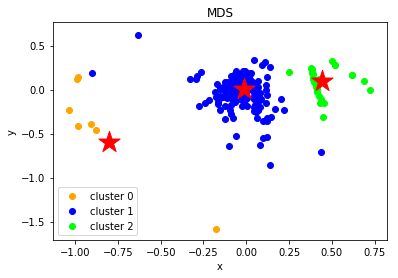

In [10]:
# Apply MDS to generate 2D data
XYcoordinates = manifold.MDS(n_components=2).fit_transform(df_data_and_centers)

# Plot
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')


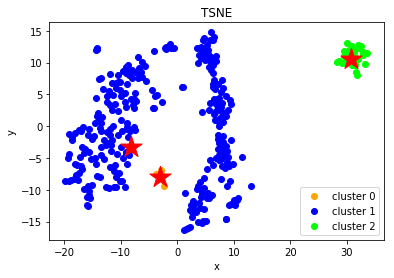

In [6]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(df_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [7]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
print("\nhead:\n", df.head())
print("\ntail:\n", df.tail())
print("\ndf.groupby('cluster').mean():\n", df.groupby('cluster').mean())


head:
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             2483             2466.0          90               180   
1             4917                0.0         130               360   
2             4106                0.0          40               180   
3             3859             3300.0         142               180   
4             6417                0.0         157               180   

   Credit_History  cluster  
0               0        0  
1               0        0  
2               1        2  
3               1        2  
4               1        2  

tail:
      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
327             5417             4196.0         267               360   
328            16666                0.0         275               360   
329            10750                0.0         312               360   
330             5955             5625.0         315               360   
331             61

  * Cluster 0: group with **lowest combined income** also have the **lowest mean loan amount and loan amount terms**. 
  * Cluster 1: group with middle combined income also have middle loan amount but the **highest loan amount terms**
  * Cluster 2: group with **highest combined income** also have the **higest loan amount** but second hights loan amount terms.

In [8]:
#TODO
# Read about pd.Series